In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from wordcloud import WordCloud
import acquire, prepare

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/parkervoit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/parkervoit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Spam Data

In [2]:
spam_df = pd.read_csv('spam_clean.csv')

In [3]:
spam_df.iloc[90: 91]

,label,text
90,ham,Yeah do! DonÛ÷t stand to close tho- youÛ÷ll ...


In [4]:
ham_words = prepare.basic_clean(' '.join(spam_df[spam_df.label == 'ham'].text))
spam_words = prepare.basic_clean(' '.join(spam_df[spam_df.label == 'spam'].text))
all_words = prepare.basic_clean(' '.join(spam_df.text))

In [5]:
ham_words = prepare.tokenize(ham_words)
spam_words = prepare.tokenize(spam_words)
all_words = prepare.tokenize(all_words)

In [6]:
ham_words = prepare.lemmatize(ham_words)
spam_words = prepare.lemmatize(spam_words)
all_words = prepare.lemmatize(all_words)

In [7]:
ham_words = prepare.remove_stopwords(ham_words)
spam_words = prepare.remove_stopwords(spam_words)
all_words = prepare.remove_stopwords(all_words)

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat ok lar joking wif u oni u dun say so early hor u c already then say nah i dont think he go to usf he life around here though even my brother is not like to speak with me they treat me like aid patent a per your request melle melle oru minnaminunginte nurungu vettam ha been set a your callertune for all caller press 9 to copy your friend callertune im gonna be home soon and i dont want to talk about this stuff anymore tonight k ive cried enough today ive been searching for the right word to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all time i have a date on sunday with will oh kim watching here eh u remember how 2 spell his name yes i did he v naughty make until i v wet fine if thataos the way u feel thataos the way it gota b is that seriously how you spell his name ium going to try for 2

In [8]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [9]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
u,1027,155,1182
im,449,13,462
get,314,83,397
2,305,173,478
ltgt,276,0,276


In [10]:
word_counts.sort_values('spam', ascending=False).head(10)

,ham,spam,all
call,241,359,600
free,59,216,275
2,305,173,478
u,1027,155,1182
txt,13,150,163
ur,240,144,384
text,77,137,214
mobile,15,135,150
4,168,119,287
claim,0,115,115


In [11]:
word_counts.sort_values(['spam', 'ham'], ascending=[True, False]).head(10)

,ham,spam,all
ltgt,276,0,276
lor,160,0,160
later,134,0,134
da,132,0,132
say,118,0,118
i_,117,0,117
thats,94,0,94
ask,88,0,88
said,86,0,86
amp,82,0,82


Text(0.5, 1.0, '% of spam vs ham for the most common 20 words')

<Figure size 1152x648 with 0 Axes>

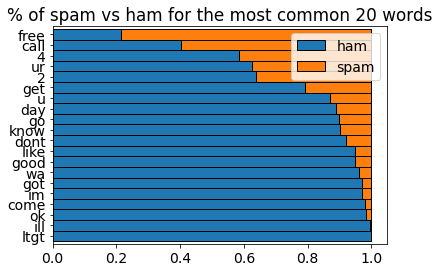

In [12]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=14)
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='spam')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of spam vs ham for the most common 20 words')


## Now lets go answer the bigrams question

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

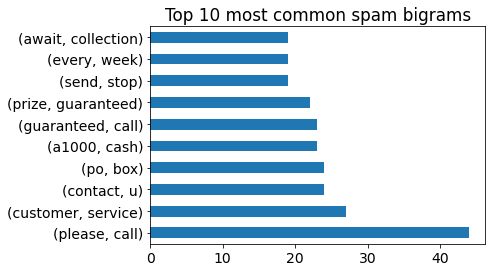

In [13]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')

Text(0.5, 1.0, 'Top 10 most common ham bigrams')

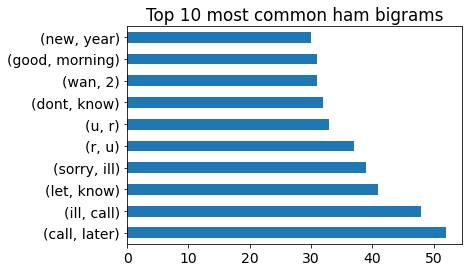

In [14]:
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams')

Text(0.5, 1.0, 'Wordcloud of Spam Texts')

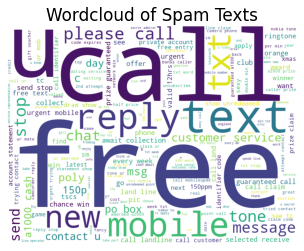

In [15]:
img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')
plt.title('Wordcloud of Spam Texts')

In [16]:
ham_big = pd.Series(nltk.bigrams(ham_words.split())).value_counts()

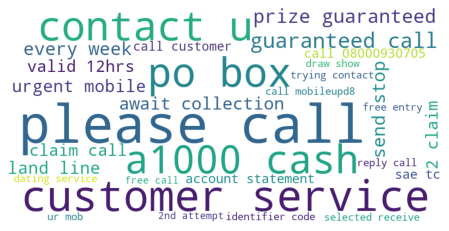

In [17]:
data = {k[0] + ' ' + k[1]: v for k, v in pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(30).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()


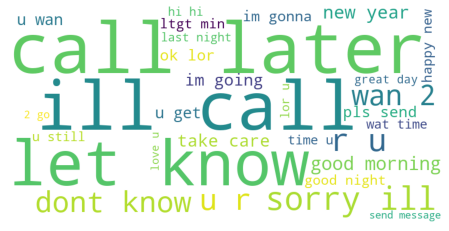

In [18]:
data = {k[0] + ' ' + k[1]: v for k, v in pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(30).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

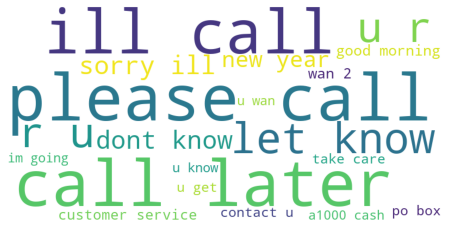

In [19]:
data = {k[0] + ' ' + k[1]: v for k, v in pd.Series(nltk.bigrams(all_words.split())).value_counts().head(20).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### Bigram takeaways:

There really aren't any overlapping bigrams. The spam bigrams definitely seem to be something that would be contained in one of those "claim your free cash prize now!" style scam texts. 

The actual ham messages seem much more conversational and something you would text your friend or family 

## Now lets do a trigram

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

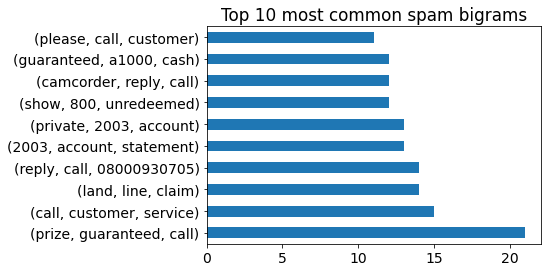

In [20]:
pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

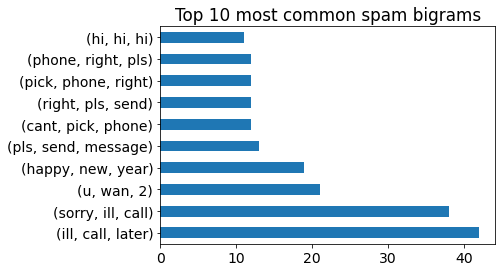

In [21]:
pd.Series(nltk.trigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')

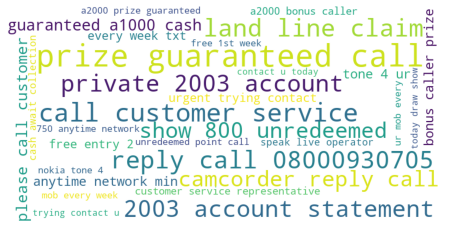

In [22]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(30).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

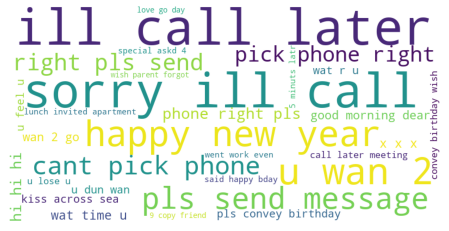

In [23]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in pd.Series(nltk.trigrams(ham_words.split())).value_counts().head(30).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### Trigram takeaways: 

Again as with bigrams, there are not many overlapping bigrams. Most of the spam seem to be talking about an account status or other sort of correspondance that is urgent. Also seems to be trying to sell a lot of music(probably ringtones) or imploring people to call a live operator

The ham messages seem more like greetings or something holiday greetings. Also asking what people are doing at that time, or kiss emojis. Pretty standard interpersonal texting in my opinion

# 2. Blog articles

In [24]:
blog_df = acquire.acquire_codeup_blog()

/Users/parkervoit/Desktop/codeup-data-science/natural-language-processing-exercises/acquire.py:16: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 16 of the file /Users/parkervoit/Desktop/codeup-data-science/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


In [25]:
blog_df.head()

,title,published_date,blog_image,content
0,Codeup’s Data Science Career Accelerator is Here!,"September 30, 2018",https://codeup.com/wp-content/uploads/2018/10/...,The rumors are true! The time has arrived. Cod...
1,Data Science Myths,"October 31, 2018",https://codeup.com/wp-content/uploads/2018/10/...,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"October 17, 2018",https://codeup.com/wp-content/uploads/2018/10/...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair,"August 14, 2018",None,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,"August 14, 2018",None,Competitor Bootcamps Are Closing. Is the Model...


In [57]:
blog_df['clean'] = blog_df['content'].apply(lambda x: prepare.remove_stopwords(prepare.lemmatize(prepare.tokenize(prepare.basic_clean(x)))))

the rumor are true the time ha arrived codeup ha officially opened application to our new data science career accelerator with only 25 seat available this immersive program is one of a kind in san antonio and will help you land a job in glassdoors 1 best job in america data science is a method of providing actionable intelligence from data the data revolution ha hit san antonio resulting in an explosion in data scientist position across company like usaa accenture booz allen hamilton and heb weve even seen utsa invest 70 m for a cybersecurity center and school of data science we built a program to specifically meet the growing demand of this industry our program will be 18 week long fulltime handson and projectbased our curriculum development and instruction is led by senior data scientist maggie giust who ha worked at heb capital group and rackspace along with input from dozen of practitioner and hiring partner student will work with real data set realistic problem and the entire data

In [58]:
blog_df

,title,published_date,blog_image,content,clean
0,Codeup’s Data Science Career Accelerator is Here!,"September 30, 2018",https://codeup.com/wp-content/uploads/2018/10/...,The rumors are true! The time has arrived. Cod...,rumor true time ha arrived codeup ha officiall...
1,Data Science Myths,"October 31, 2018",https://codeup.com/wp-content/uploads/2018/10/...,By Dimitri Antoniou and Maggie Giust\nData Sci...,dimitri antoniou maggie giust data science big...
2,Data Science VS Data Analytics: What’s The Dif...,"October 17, 2018",https://codeup.com/wp-content/uploads/2018/10/...,"By Dimitri Antoniou\nA week ago, Codeup launch...",dimitri antoniou week ago codeup launched imme...
3,10 Tips to Crush It at the SA Tech Job Fair,"August 14, 2018",None,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair third biannual san antonio te...
4,Competitor Bootcamps Are Closing. Is the Model...,"August 14, 2018",None,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps closing model danger prog...


In [59]:
blog_content = ' '.join(blog_df.clean)

In [60]:
content_freq = pd.Series(blog_content.split()).value_counts()

In [61]:
content_freq.head(30)

data           75
science        26
company        20
learning       20
machine        14
job            14
scientist      13
model          12
like           12
one            10
education      10
new             9
work            9
fair            9
business        8
time            8
statistic       8
make            8
student         7
look            7
question        7
program         7
dont            7
big             7
recruiter       7
myth            7
tech            7
skill           6
codeup          6
information     6
dtype: int64

Text(0.5, 1.0, 'Top 30 used words in codeup blog posts')

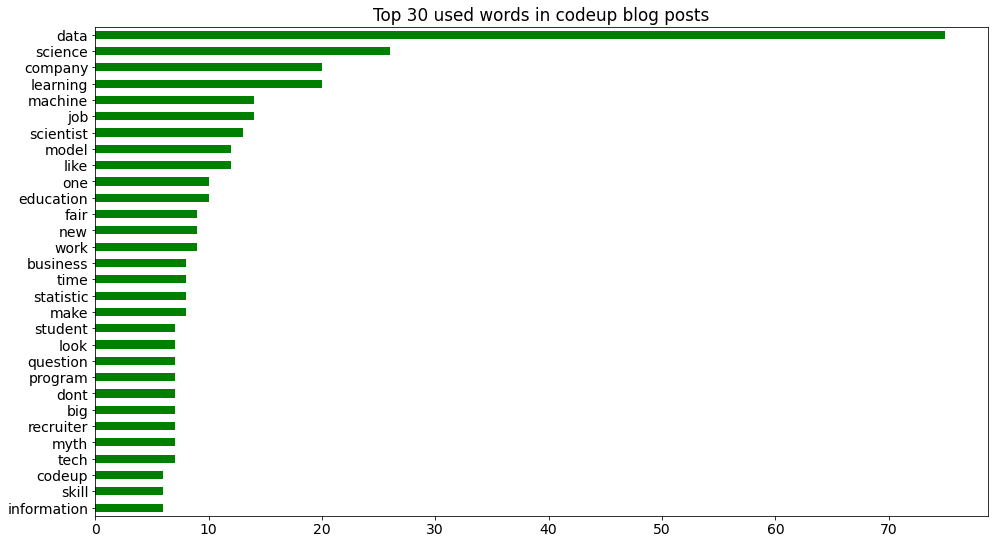

In [70]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=14)
content_freq.head(30).sort_values(ascending = True).plot.barh(color = 'green')
plt.title('Top 30 used words in codeup blog posts')

Text(0.5, 1.0, 'Top 20 most common blog bigrams')

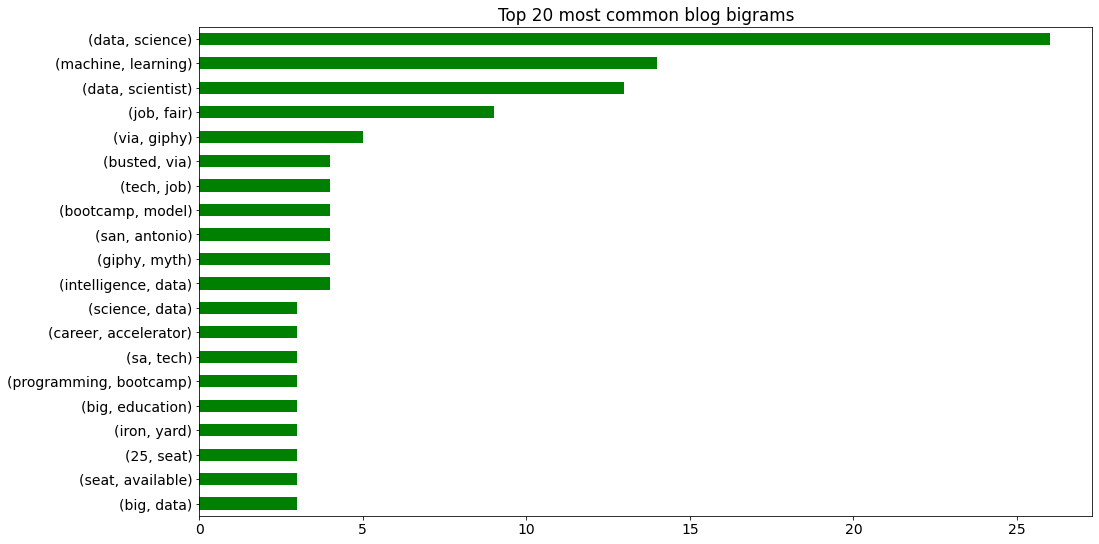

In [78]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=14)
pd.Series(nltk.bigrams(blog_content.split())).value_counts(ascending = True).tail(20).plot.barh(color = 'green')
plt.title('Top 20 most common blog bigrams')

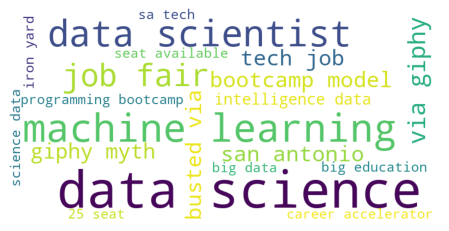

In [72]:
data = {k[0] + ' ' + k[1]: v for k, v in pd.Series(nltk.bigrams(blog_content.split())).value_counts().head(20).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Top 20 most common blog bigrams')

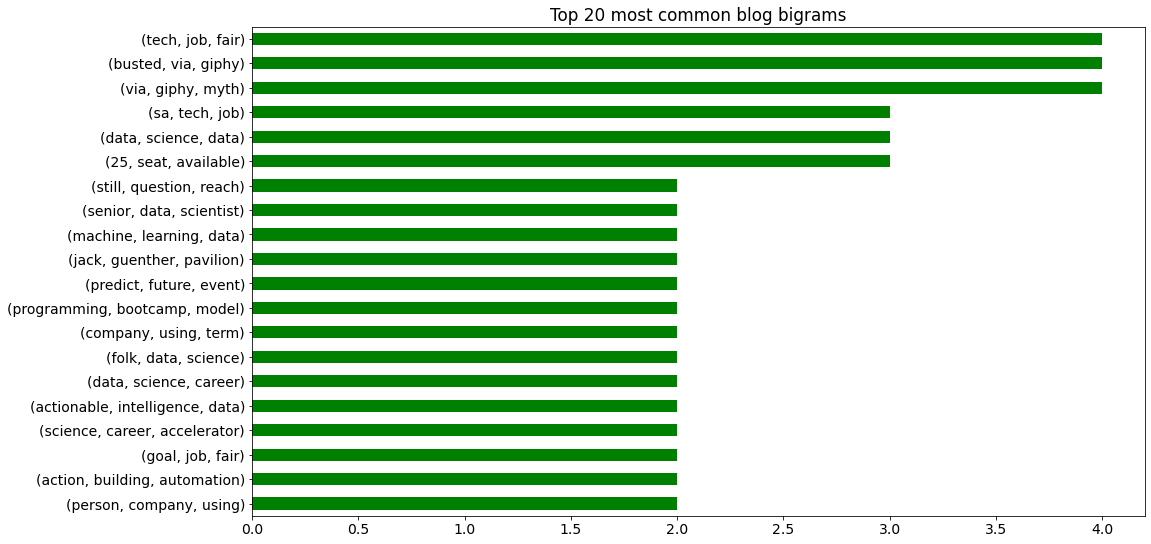

In [77]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=14)
pd.Series(nltk.trigrams(blog_content.split())).value_counts(ascending = True).tail(20).plot.barh(color = 'green')
plt.title('Top 20 most common blog bigrams')

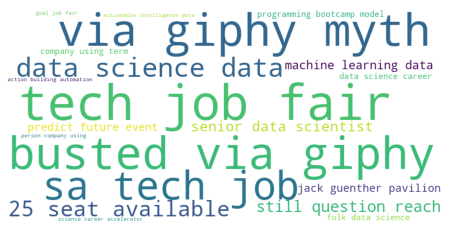

In [73]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in pd.Series(nltk.trigrams(blog_content.split())).value_counts().head(20).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### Bigram\Trigram takeaways:

It's not surprising to see data scientist and data science at the top of both bigram and trigram lists. Also, Machine learning makes sense too as does tech jobs since we do quite a bit of machine learning and Codeup talks about their business relationship with sa tech companies and job placement. 

There is quite a bit of overlap between the two which makes sense, but trigrams seem to have more useful phrases to follow up on compared to bigrams, as I think the bigrams are splitting up the trigrams. 

## 3. News Articles

In [79]:
news_df = acquire.acquire_news_articles()

/Users/parkervoit/Desktop/codeup-data-science/natural-language-processing-exercises/acquire.py:92: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 92 of the file /Users/parkervoit/Desktop/codeup-data-science/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


In [80]:
news_df

,title,content,category
0,"Reliance Industries vaccinates 98% of workers,...",Reliance Industries has said in a statement th...,business
1,Speculation around our plans for crypto not tr...,Amazon on Monday denied speculations that it w...,business
2,I will most likely not be on future earnings c...,Tesla CEO and the world's second-richest perso...,business
3,"Musk criticises Apple's 'walled garden', cobal...",Tesla's billionaire CEO Elon Musk criticised A...,business
4,Factually incorrect: INOX on report of Amazon ...,INOX Leisure denied a report that claimed Amaz...,business
...,...,...,...
143,UN panel uses $600mn in Iraqi funds to pay Kuw...,A UN commission on Tuesday used $600 million i...,world
144,"Agents working for Israel detained, weapons se...",Iran on Tuesday said that its security forces ...,world
145,"US man pleads guilty to 4 Asian spa killings, ...",A US man was handed four sentences of life aft...,world
146,China's claims in South China Sea have no basi...,China's territorial claims in the South China ...,world


In [97]:
news_df['clean'] = news_df['content'].apply(lambda x: prepare.remove_stopwords(prepare.lemmatize(prepare.tokenize(prepare.basic_clean(x)))))

reliance industry ha said in a statement that over 98 of it worker have received at least one dose of covid19 vaccine so far the billionaire mukesh ambaniled conglomerate had over 236 lakh employee of march 31 besides reliance hindustan unilever ha also given at least one shot to 90 of employee while infosys inoculated 59 employee and tc 70
amazon on monday denied speculation that it wa looking to accept bitcoin and other cryptocurrencies a a form of payment by the end of the year saying those speculation are not true the speculation regarding the same were fuelled by an amazon job posting seeking a digital currency and blockchain product lead bitcoin soared past 40000 briefly over the speculation
tesla ceo and the world secondrichest person elon musk during his company secondquarter earnings call on monday said i will no longer default to doing earnings call he added obviously ill do the annual shareholder meeting but i think that going forward ill most likely not be on earnings call 

In [101]:
df = news_df[['category','clean']]

In [102]:
df.head()

,category,clean
0,business,reliance industry ha said statement 98 worker ...
1,business,amazon monday denied speculation wa looking ac...
2,business,tesla ceo world secondrichest person elon musk...
3,business,tesla billionaire ceo elon musk criticised app...
4,business,inox leisure denied report claimed amazon indi...


In [144]:
business_words = ' '.join(df.clean[df.category == 'business'])
sports_words = ' '.join(df.clean[df.category == 'sports'])
tech_words = ' '.join(df.clean[df.category == 'technology'])
entertainment_words = ' '.join(df.clean[df.category == 'entertainment'])
science_words = ' '.join(df.clean[df.category == 'science'])
world_words = ' '.join(df.clean[df.category == 'world'])

In [145]:
business_freq = pd.Series(business_words.split()).value_counts()
sports_freq = pd.Series(sports_words.split()).value_counts()
tech_freq = pd.Series(tech_words.split()).value_counts()
entertainment_freq = pd.Series(entertainment_words.split()).value_counts()
science_freq = pd.Series(science_words.split()).value_counts()
world_freq = pd.Series(world_words.split()).value_counts()

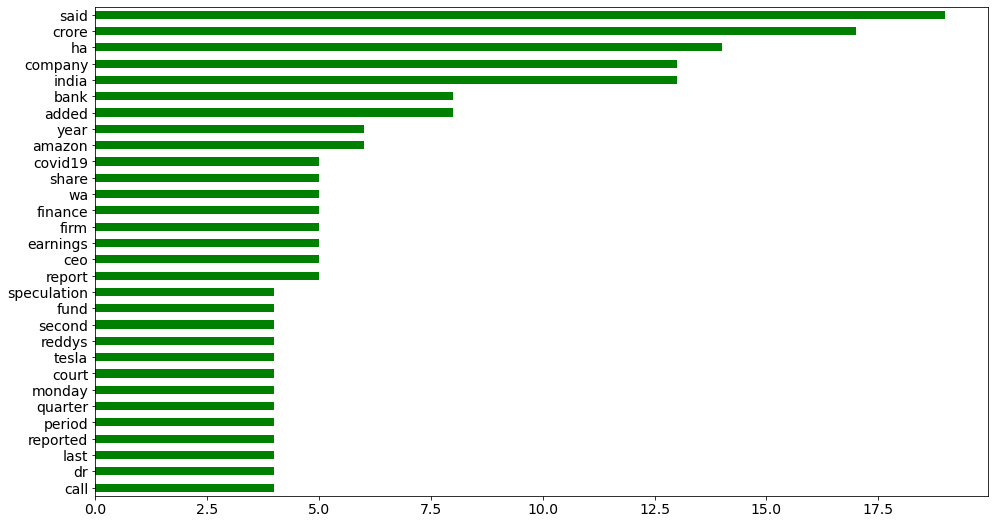

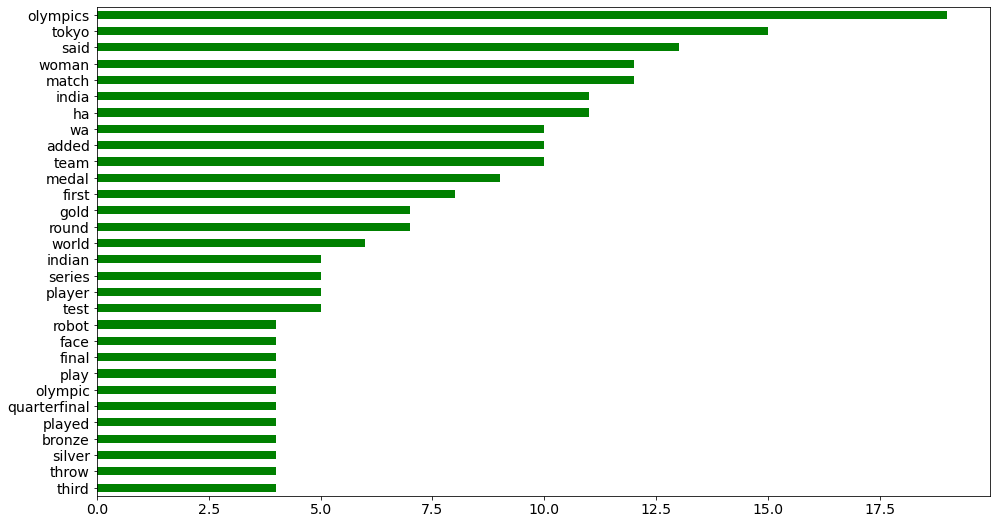

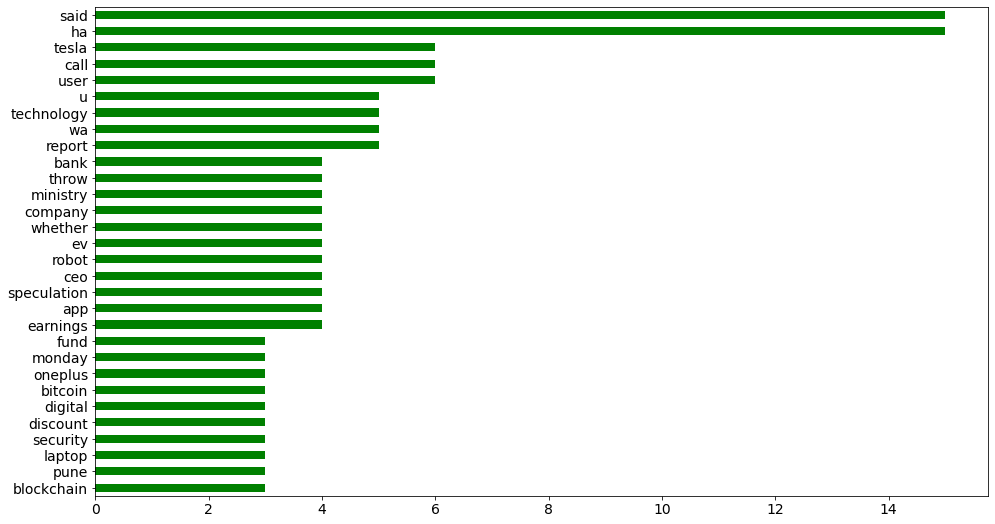

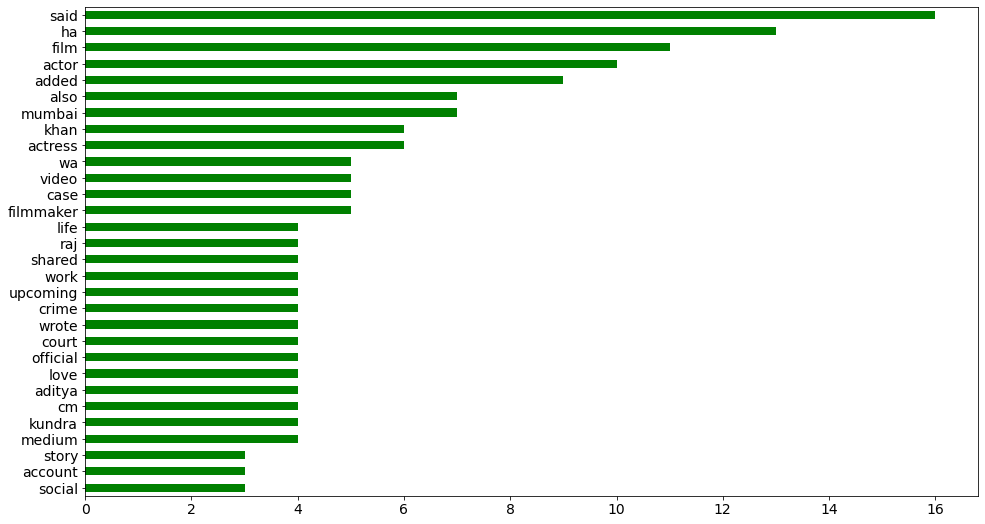

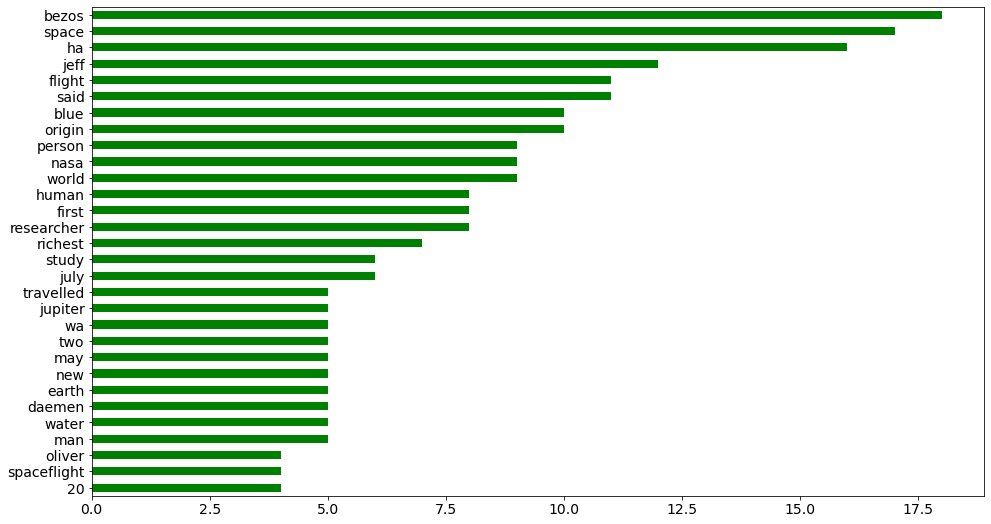

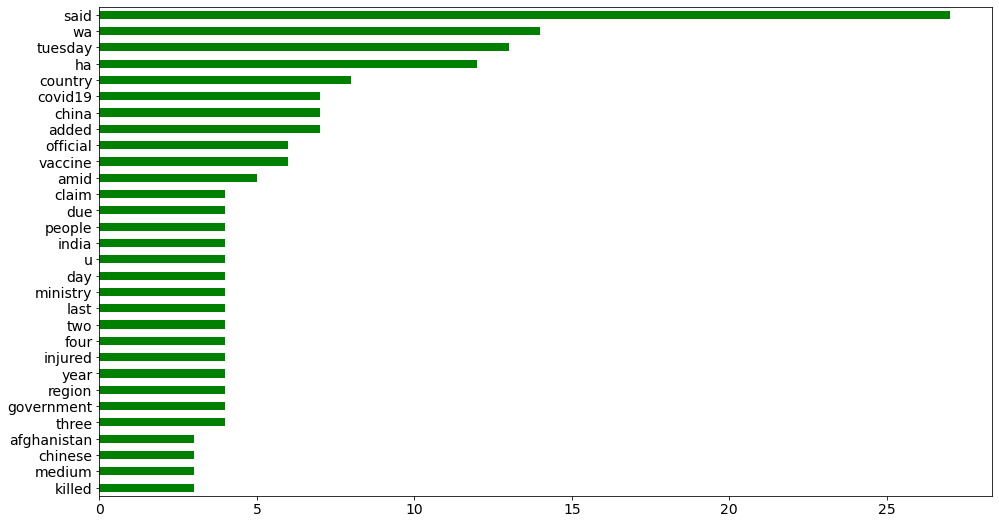

In [142]:
genre_list = [business_freq, sports_freq, tech_freq, entertainment_freq, science_freq, world_freq]
genre_names = ['business','sports','tech','entertainment','science','world']
genres = {'business':business_freq,
          'sports':sports_freq,
          'tech':tech_freq,
          'entertainment':entertainment_freq,
          'science':science_freq,
          'world':world_freq}
for x in genre:
    plt.figure(figsize=(16, 9))
    plt.rc('font', size=14)
    x.head(30).sort_values(ascending = True).plot.barh(color = 'green')
    #plt.title(f'Top 30 used words in {genres[key]} news articles')
    plt.show()

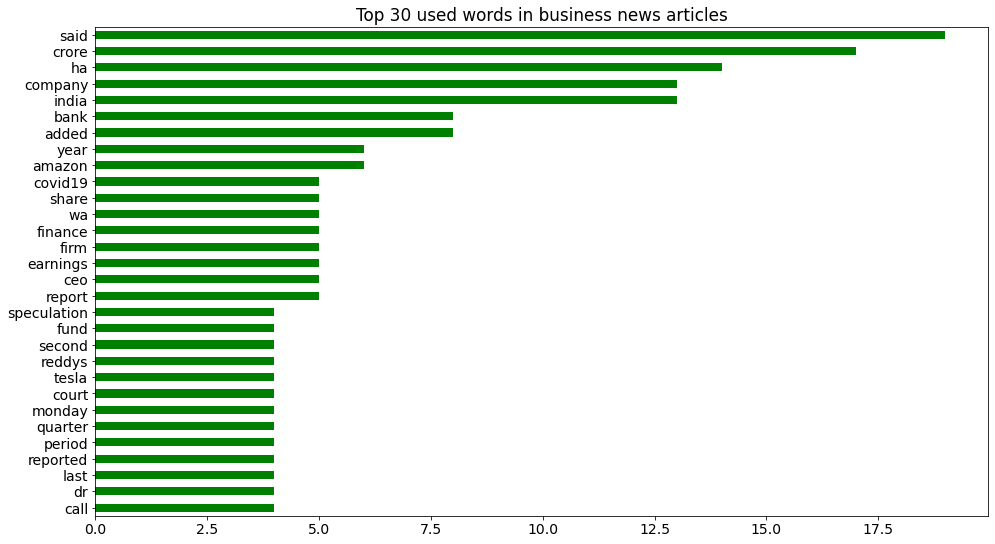

In [146]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=14)
business_freq.head(30).sort_values(ascending = True).plot.barh(color = 'green')
plt.title(f'Top 30 used words in business news articles')
plt.show()

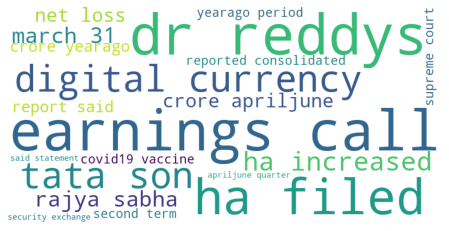

In [153]:
data = {k[0] + ' ' + k[1]: v for k, v in pd.Series(nltk.bigrams(business_words.split())).value_counts().head(20).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

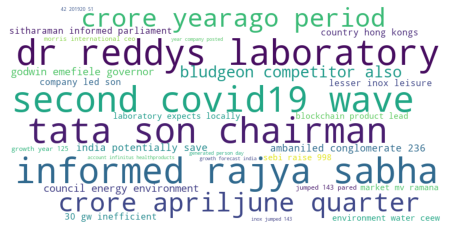

In [159]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in pd.Series(nltk.trigrams(business_words.split())).value_counts().head(30).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

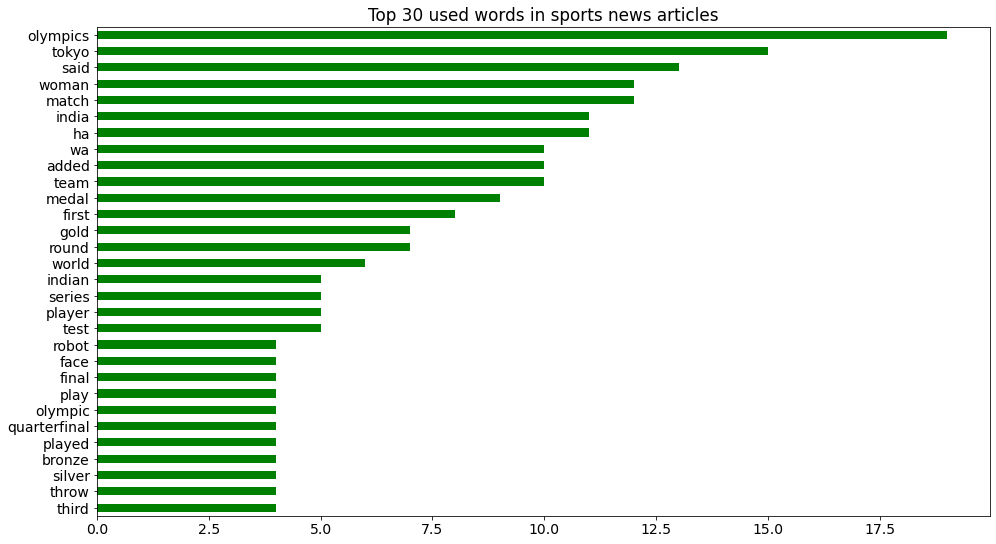

In [148]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=14)
sports_freq.head(30).sort_values(ascending = True).plot.barh(color = 'green')
plt.title(f'Top 30 used words in sports news articles')
plt.show()

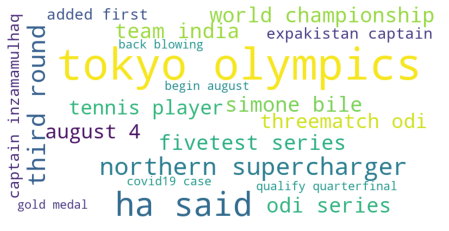

In [154]:
data = {k[0] + ' ' + k[1]: v for k, v in pd.Series(nltk.bigrams(sports_words.split())).value_counts().head(20).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

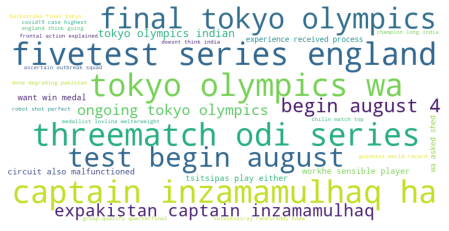

In [160]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in pd.Series(nltk.trigrams(sports_words.split())).value_counts().head(30).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

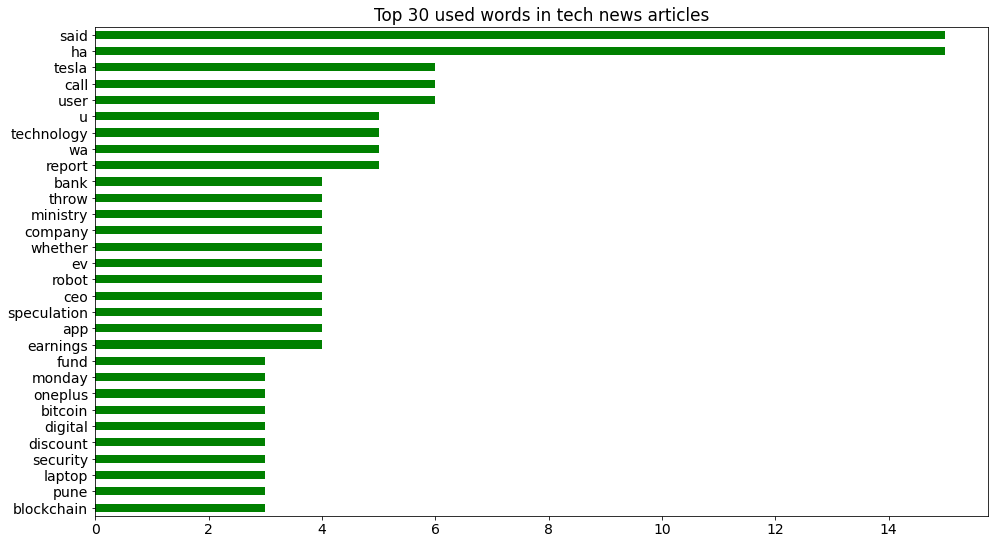

In [149]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=14)
tech_freq.head(30).sort_values(ascending = True).plot.barh(color = 'green')
plt.title(f'Top 30 used words in tech news articles')
plt.show()

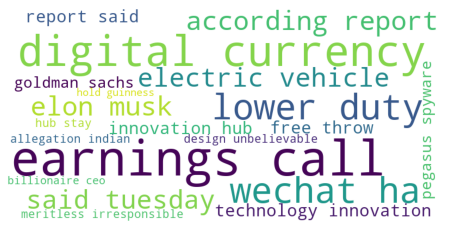

In [156]:
data = {k[0] + ' ' + k[1]: v for k, v in pd.Series(nltk.bigrams(tech_words.split())).value_counts().head(20).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

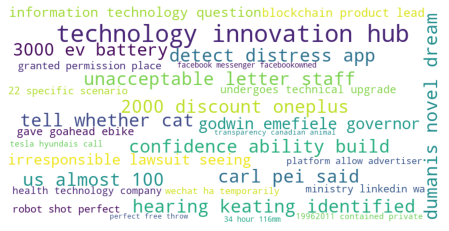

In [161]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in pd.Series(nltk.trigrams(tech_words.split())).value_counts().head(30).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

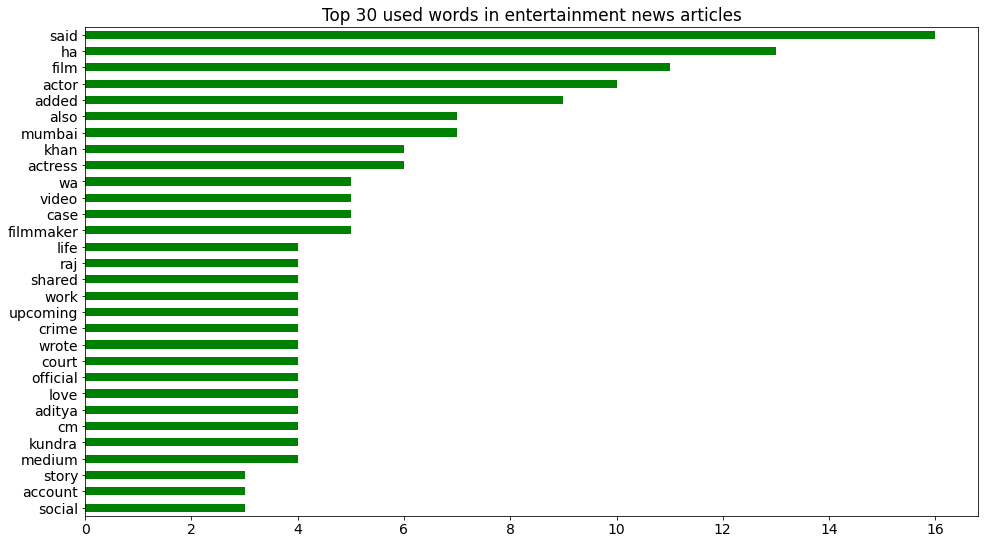

In [150]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=14)
entertainment_freq.head(30).sort_values(ascending = True).plot.barh(color = 'green')
plt.title(f'Top 30 used words in entertainment news articles')
plt.show()

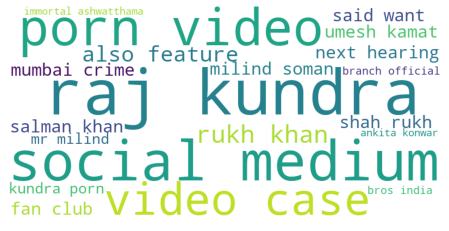

In [157]:
data = {k[0] + ' ' + k[1]: v for k, v in pd.Series(nltk.bigrams(entertainment_words.split())).value_counts().head(20).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

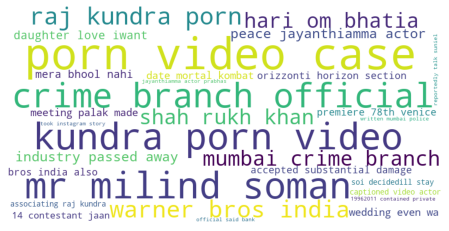

In [162]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in pd.Series(nltk.trigrams(entertainment_words.split())).value_counts().head(30).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

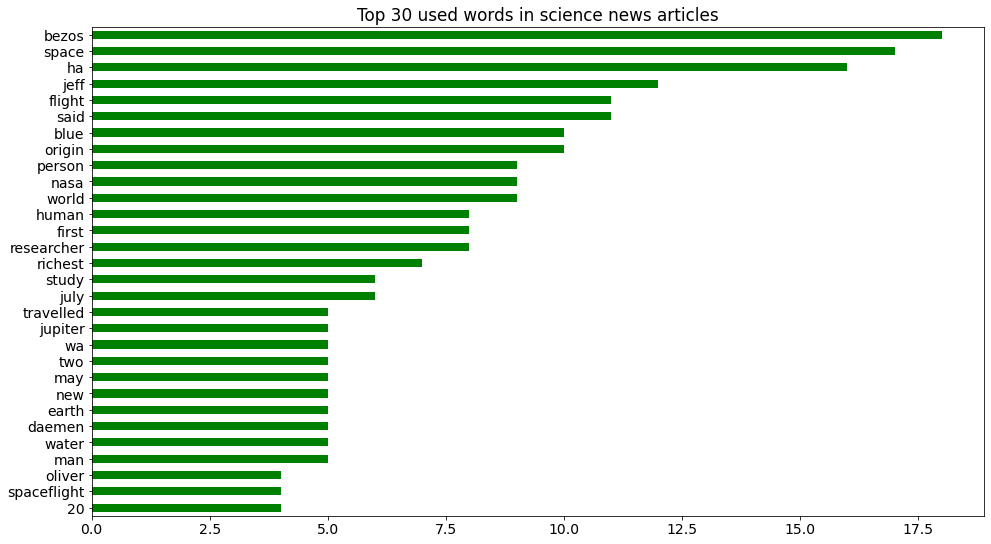

In [152]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=14)
science_freq.head(30).sort_values(ascending = True).plot.barh(color = 'green')
plt.title(f'Top 30 used words in science news articles')
plt.show()

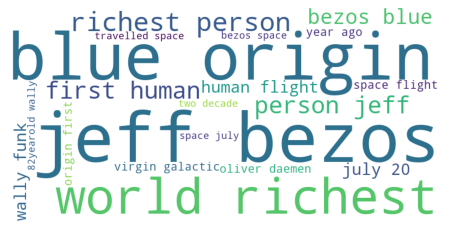

In [158]:
data = {k[0] + ' ' + k[1]: v for k, v in pd.Series(nltk.bigrams(science_words.split())).value_counts().head(20).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

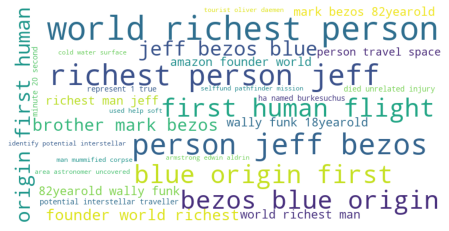

In [163]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in pd.Series(nltk.trigrams(science_words.split())).value_counts().head(30).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()